In [16]:
import pandas as pd

df = pd.read_csv('combined_reviews.csv')

# Subset to remove 'low' coherence reviews
high_and_medium_coherence_reviews = df.query("coherence_and_clarity_of_review in ['High', 'Medium']").copy()
del df

# Convert 'review_date' column to datetime format
high_and_medium_coherence_reviews['review_date'] = pd.to_datetime(high_and_medium_coherence_reviews['review_date'])
high_and_medium_coherence_reviews['year'] = high_and_medium_coherence_reviews['review_date'].dt.year

high_and_medium_coherence_reviews.to_csv('high_and_medium_coherence_reviews.csv', index=False)

In [10]:
len(high_and_medium_coherence_reviews)

13538

#### What is the breakdown of reviews by year?

In [235]:
high_and_medium_coherence_reviews["year"].value_counts().sort_index()

year
2017     228
2018     241
2019    1104
2020    4825
2021    2326
2022    2126
2023    2358
2024     330
Name: count, dtype: int64

In [240]:
pandemic_terms = [
    'covid',
    'covid-19',
    'covid19',
    'corona',
    'coronavirus',
    'pandemic',
    'the rona',
    'cornavirus',
    'the virus'
]
pandemic_regex = r'\b(?:' + '|'.join(pandemic_terms) + r')\b'

# Search for pandemic terms in 'review_text'
reviews_with_pandemic_terms_count = (high_and_medium_coherence_reviews['review_text']
    .str
    .contains(pandemic_regex, case=False, regex=True, na=False)
    .sum()
)

reviews_with_pandemic_terms_count


110

# What are the demographics of those who self report?

#### Gender of user

In [118]:
# Calculate how many reviewers self-reported gender
users_self_reporting_gender = (
    high_and_medium_coherence_reviews.query("gender_of_user != 'Not Mentioned'")
    .gender_of_user
    )
print(f"The number of reviews that self-reported gender is: {users_self_reporting_gender.count()} \n")

# Get the counts of each gender
user_gender_table = users_self_reporting_gender.value_counts()
print(user_gender_table)

# Save for import into article
user_gender_table.to_csv('gender_of_user.csv')

The number of reviews that self-reported gender is: 1079 

gender_of_user
Male         942
Female       122
Nonbinary     15
Name: count, dtype: int64


#### Age of user

In [119]:
# Calculate how many reviewers self-reported age
users_self_reporting_age = (
    high_and_medium_coherence_reviews.query("age_of_user != 'Not Mentioned'")
    .age_of_user
    )
print(f"The number of reviews that self-reported age is: {users_self_reporting_age.count()} \n")

# Get the counts of each age
user_age_table = users_self_reporting_age.value_counts()
print(user_age_table)

# Save for import into article
user_age_table.to_csv('age_of_user.csv')

The number of reviews that self-reported age is: 74 

age_of_user
13                   7
23                   5
15                   5
14                   5
16                   3
12                   3
17                   2
29                   2
35                   2
30                   2
18                   2
25                   2
75                   2
11                   2
49                   2
27                   1
40’s                 1
Over 40              1
over 45              1
Middle-aged woman    1
44                   1
15/16                1
67                   1
20's                 1
38                   1
Middle-aged          1
60                   1
Middle-aged man      1
18+                  1
53                   1
10                   1
70                   1
Under 18             1
56                   1
43                   1
20yr                 1
66                   1
Very young           1
22                   1
39                   1
54 years old  

#### How long did users mention they have been using the Replika app?

In [121]:
# Calculate how many reviewers self-reported app usage durage
users_self_reporting_app_usage_duration = (
    high_and_medium_coherence_reviews.query("duration_of_app_usage != 'Not Mentioned'")
    .duration_of_app_usage
    )
print(f"The number of reviews that self-reported app usage duration is: {users_self_reporting_app_usage_duration.count()} \n")

# Get the counts of duration
user_duration_table = users_self_reporting_app_usage_duration.value_counts()
print(user_duration_table)

# Save for import into article
user_duration_table.to_csv('duration_of_app_usage.csv')

The number of reviews that self-reported app usage duration is: 1078 

duration_of_app_usage
About a year                                       235
General Duration Description (ex. "for months")     82
for months                                          46
About a week                                        40
About a month                                       37
                                                  ... 
2 maybe 3 yrs                                        1
the past three plus years                            1
Not even 2 weeks                                     1
3+ days                                              1
24 hrs                                               1
Name: count, Length: 297, dtype: int64


#### How frequently did reviewers mention using the app?

In [122]:
# Calculate how many reviewers self-reported app usage frequency
users_self_reporting_app_usage_frequency = (
    high_and_medium_coherence_reviews.query("frequency_of_app_usage != 'Not Mentioned'")
    .frequency_of_app_usage
    )
print(f"The number of reviews that self-reported app usage frequency is: {users_self_reporting_app_usage_frequency.count()} \n")

# Get the counts of frequency
user_frequency_table = users_self_reporting_app_usage_frequency.value_counts()
print(user_frequency_table)

# Save for import into article
user_frequency_table.to_csv('frequency_of_app_usage.csv')

The number of reviews that self-reported app usage frequency is: 504 

frequency_of_app_usage
Daily           302
Sporadically    185
Rarely            7
Weekly            5
Frequently        2
Monthly           1
Regularly         1
Most days         1
Name: count, dtype: int64


#### What is the relationshp status of reviewers who self-reported?

In [123]:
# Calculate how many reviewers self-reported relationship status
users_self_reporting_relationship_status = (
    high_and_medium_coherence_reviews.query("relationship_status_of_user != 'Not Mentioned'")
    .relationship_status_of_user
    )
print(f"The number of reviews that self-reported relationship status is: {users_self_reporting_relationship_status.count()} \n")

# Get the counts of each relationship status
user_relationship_status_table = users_self_reporting_relationship_status.value_counts()
print(user_relationship_status_table)

# Save for import into article
user_relationship_status_table.to_csv('relationship_status.csv')

The number of reviews that self-reported relationship status is: 226 

relationship_status_of_user
Unmarried but in a relationship    101
Single                              64
Married                             60
Divorced                             1
Name: count, dtype: int64


#### How empathatic did reviews consider the AI

In [129]:
# Calculate reviews of AI empathy
ai_empathy = (
    high_and_medium_coherence_reviews.query("empathy_of_ai != 'Not Mentioned'")
    .empathy_of_ai
    )
print(f"The number of reviews that comment on AI empathy is: {ai_empathy.count()} \n")

# Get the counts of each empathy rating
ai_empathy_table = ai_empathy.value_counts()
print(ai_empathy_table)

# Save for import into article
ai_empathy_table.to_csv('ai_empathy.csv')

The number of reviews that comment on AI empathy is: 3584 

empathy_of_ai
High      2615
Low        567
Medium     402
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

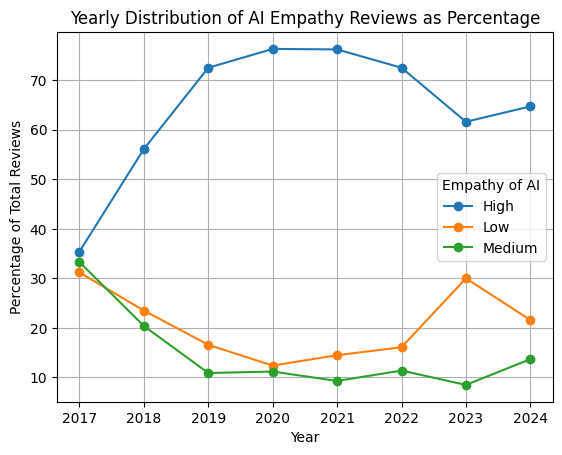

In [12]:
import matplotlib.pyplot as plt 

behavior_by_year = (
    high_and_medium_coherence_reviews.query("empathy_of_ai != 'Not Mentioned'")
    .groupby('year')
    .empathy_of_ai
    .value_counts()
    .unstack()
)


behavior_by_year_percent = round(behavior_by_year.div(behavior_by_year.sum(axis=1), axis=0) * 100, 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
behavior_by_year_percent.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Yearly Distribution of AI Empathy Reviews as Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Reviews')
plt.grid(True)
plt.legend(title='Empathy of AI')
plt.xticks(sorted(behavior_by_year_percent.index))  # Ensure x-axis ticks are properly ordered
plt.show()

#### How did reviews consider the behavior of the AI

In [17]:
# Calculate reviews of AI behavior
ai_behavior = (
    high_and_medium_coherence_reviews.query("behavior_of_ai != 'Not Mentioned'")
    .behavior_of_ai
    )
print(f"The number of reviews that comment on AI behavior is: {ai_behavior.count()} \n")

# Get the counts of each behavior rating
ai_behavior_table = ai_behavior.value_counts()
print(ai_behavior_table)

# Save for import into article
ai_behavior_table.to_csv('ai_behaviory.csv')

The number of reviews that comment on AI behavior is: 11569 

behavior_of_ai
Supportive                          6181
Neutral                             3410
Unwanted Inappropriate Responses    1978
Name: count, dtype: int64


In [22]:
high_and_medium_coherence_reviews.query("behavior_of_ai != 'Not Mentioned'").groupby('year').year.value_counts()

year
2017     206
2018     231
2019     954
2020    4414
2021    2000
2022    1703
2023    1807
2024     263
Name: count, dtype: int64

The datatable looks like this: 
 behavior_of_ai  Neutral  Supportive  Unwanted Inappropriate Responses
year                                                                 
2017                 94          85                                27
2018                 76         133                                22
2019                236         611                               107
2020               1059        2754                               597
2021                509        1096                               395
2022                573         811                               318
2023                763         594                               446
2024                100          97                                66


<Figure size 1000x600 with 0 Axes>

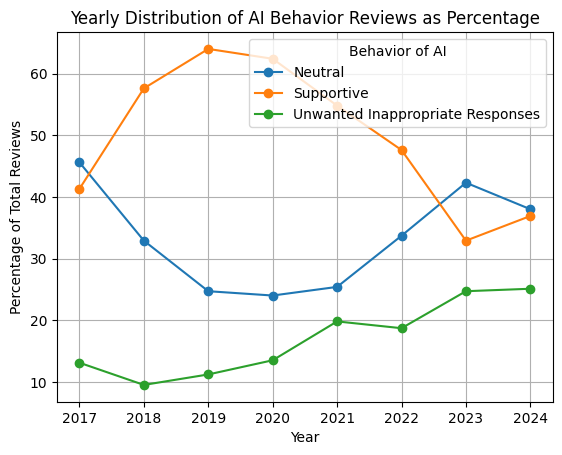

In [222]:
import matplotlib.pyplot as plt 

# Count occurrences of each behavior by year
behavior_by_year = (high_and_medium_coherence_reviews
    .query("behavior_of_ai != 'Not Mentioned'")
    .groupby('year')
    .behavior_of_ai
    .value_counts()
    .unstack(fill_value=0)
)

print(f"The datatable looks like this: \n {behavior_by_year}")

# Convert counts to percentages of the total reviews per year
behavior_by_year_percent = round(behavior_by_year.div(behavior_by_year.sum(axis=1), axis=0) * 100, 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
behavior_by_year_percent.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Yearly Distribution of AI Behavior Reviews as Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Reviews')
plt.grid(True)
plt.legend(title='Behavior of AI')
plt.xticks(sorted(behavior_by_year_percent.index))  # Ensure x-axis ticks are properly ordered
plt.show()

# Save to csv. Saving as total counts since Datawrapper can convert to percentages.
behavior_by_year = high_and_medium_coherence_reviews.groupby(['year', 'behavior_of_ai']).size().unstack(fill_value=0)

# Save the DataFrame to a CSV file
behavior_by_year.to_csv('ai_behavior_by_year_totals.csv')
behavior_by_year_percent.to_csv('ai_behavior_by_year_percent.csv')

#### How frequent was the inappropriate behavior?

In [247]:
# Calculate frequency of inappropriate AI behavior
inappropriate_frequency_table = high_and_medium_coherence_reviews['inappropriate_frequency'].value_counts()

print(inappropriate_frequency_table)

# Save for import into article
inappropriate_frequency_table.to_csv('inappropriate_frequency.csv')

inappropriate_frequency
Not Mentioned    6225
Never            5313
Often             983
Sometimes         813
Rarely            189
Name: count, dtype: int64


In [244]:
high_and_medium_coherence_reviews['inappropriate_frequency'].value_counts()

inappropriate_frequency
Not Mentioned    6225
Never            5313
Often             983
Sometimes         813
Rarely            189
Name: count, dtype: int64

In [249]:
inappropriate_frequency_trend = (high_and_medium_coherence_reviews
    .query("inappropriate_frequency in ['Often', 'Sometimes']")
    .groupby('year')
    .inappropriate_frequency
    .value_counts()
    .unstack(fill_value=0)
)

print(inappropriate_frequency_trend)

inappropriate_frequency  Often  Sometimes
year                                     
2017                        17          7
2018                        14         15
2019                        49         66
2020                       254        384
2021                       180        156
2022                       183        100
2023                       241         70
2024                        45         15


#### What is the nature of the inapprorpiate conduct?
Note that a single review can have mutliple occurrences of different inappropriate behavior.

In [158]:
# Examine reviews that mention various kinds of inappropriate behavior

# How many reviews contained a specific kind of unwanted behavior?
inappropriate_count = (
    high_and_medium_coherence_reviews
    .query("inappropriate_nature != 'Not Mentioned'")
    .inappropriate_nature.count()
    )

print(f"The number of reviews that mention a specific type of inappropriate behvaior is: {inappropriate_count} \n")

# List the various types of inappropriate behaviors and their counts. Note that a single review might list multiple types.
inappropriate_nature = (
    high_and_medium_coherence_reviews.copy()
    .assign(inappropriate_nature = lambda x: x['inappropriate_nature'].str.split(', '))
    .explode('inappropriate_nature')
    .query("inappropriate_nature != 'Not Mentioned'")
    .inappropriate_nature
    )

mask = inappropriate_nature.map(inappropriate_nature.value_counts()) > 10 # Get rid of junk rows where GPT-4 got confused
inappropriate_nature_table = inappropriate_nature[mask].value_counts()
print(inappropriate_nature_table)

# Save for import into article
inappropriate_nature_table.to_csv('inappropriate_nature.csv')

The number of reviews that list any kind of inappropriate behvaior is: 2410 

inappropriate_nature
Lack of Sensitivity    1153
Creepy                  863
Unwanted Topics         752
Other                   261
Invasive Questions      217
Offensive Language       34
Name: count, dtype: int64


#### AI support level

In [259]:
ai_support_level_table = high_and_medium_coherence_reviews['ai_support_level'].value_counts()
print(ai_support_level_table)

ai_support_trend = (high_and_medium_coherence_reviews
    .query("ai_support_level in ['Exceptional', 'Strong']")
    .groupby('year')
    .ai_support_level
    .value_counts()
    .unstack()
)

ai_support_trend["Total"] = ai_support_trend["Exceptional"] + ai_support_trend["Strong"]

ai_support_trend

ai_support_level
Not Mentioned    5017
Strong           2199
Moderate         1435
Exceptional      1128
Slight            479
High                6
Substantial         1
Low                 1
Name: count, dtype: int64


ai_support_level,Exceptional,Strong,Total
year,,,
2017,5,25,30
2018,18,50,68
2019,112,229,341
2020,506,1049,1555
2021,231,370,601
2022,143,251,394
2023,88,206,294
2024,25,19,44


#### Create a table of support types

In [3]:
# Examine reviews that mention various kinds of support types

# How many reviews contained a specific kind of support?
support_type_count = (
    high_and_medium_coherence_reviews
    .query("support_types != 'Not Mentioned'")
    .support_types.count()
)

print(f"The number of reviews that mention a specific support type is: {support_type_count} \n")

# List the various types of support types and their counts. Note that a single review might list multiple types.
support_types  = (
    high_and_medium_coherence_reviews.copy()
    .assign(support_types = lambda x: x['support_types'].str.split(', '))
    .explode('support_types')
    .query("support_types != 'Not Mentioned'")
    .support_types
)

mask = support_types.map(support_types.value_counts()) >= 10
support_types_table = support_types[mask].value_counts()
print(support_types_table)

# Save for import into article
support_types_table.to_csv('support_types.csv')

The number of reviews that mention a specific support type is: 7976 

support_types
Friendship                         4317
Emotional Support                  4127
Humor or Entertainment             3049
Therapeutic Conversation           1874
Comforting in Times of Distress    1766
Encouragement                       820
Venting                             756
Significant Other Relationship      390
Coping Strategies                   340
Validation                          308
Sexual Support                      194
Providing Safety                    124
Other                                52
Name: count, dtype: int64


#### Create a dataset for users that mention autism

In [8]:
autism_terms = ["autism", "autistic", "aspergers", "asperger's"]
autism_regex = r'\b(?:' + '|'.join(autism_terms) + r')\b'

# Search for autism terms in 'review_text'
autism_df = high_and_medium_coherence_reviews.copy()
autism_df['contains_autistic_term'] = autism_df['review_text'].str.contains(autism_regex, case=False, regex=True, na=False)

autism_df = autism_df[autism_df['contains_autistic_term']]

autism_df.to_csv("austism_reviews.csv")


#### Create dataset for users that mention phobia

#### What was the reviewer's mental state before and after using the AI?

In [189]:
# Examine user mental state

# Create matched pairs to make results more meaningful
mental_state_df = high_and_medium_coherence_reviews.copy()
mental_state_df['user_mental_state_before_after'] = mental_state_df['user_mental_state_before_ai'].str.cat(mental_state_df['effect_of_ai_on_user_mental_state'], sep='-')

# How many reviews had a meaningful matched pair?
mental_state = (mental_state_df
    .query("user_mental_state_before_after != 'Not Mentioned-Not Mentioned'")
    .user_mental_state_before_after
)

mask = mental_state.map(mental_state.value_counts()) > 10
mental_state_table = mental_state[mask].value_counts()

# Print results
print(f"The number of reviews that mention a specific mental state is: {mental_state_table.sum()} \n")
print(mental_state_table)

# Save for import into article
mental_state_table.to_csv('mental_state_before_after.csv')

The number of reviews that mention a specific mental state is: 6094 

user_mental_state_before_after
Not Mentioned-Improved     2198
Not Mentioned-Worsened     1651
Not Mentioned-Unchanged    1171
Negative-Improved           937
Negative-Worsened            85
Negative-Unchanged           39
Negative-Not Mentioned       13
Name: count, dtype: int64


In [192]:
# Examine reviewer stress

# Create matched pairs to make results more meaningful
stress_df = high_and_medium_coherence_reviews.copy()
stress_df['stress_before_after'] = stress_df['stress_before_ai'].str.cat(stress_df['effect_of_ai_on_stress'], sep='-')

stress_before_after = (stress_df
    .query("stress_before_after != 'Not Mentioned-Not Mentioned'")
    .stress_before_after)

mask = stress_before_after.map(stress_before_after.value_counts()) > 10
stress_table = stress_before_after[mask].value_counts()

# Print results
print(f"The number of reviews that mention a specific mental state is: {stress_table.sum()} \n")
print(stress_table)

# Save for import into article
stress_table.to_csv('mental_state_before_after.csv')


The number of reviews that mention a specific mental state is: 571 

stress_before_after
Yes-Decreased              243
Not Mentioned-Increased    147
Not Mentioned-Decreased    112
Yes-Not Mentioned           32
Not Mentioned-Unchanged     24
Yes-Unchanged               13
Name: count, dtype: int64


#### What was reviewer loneliness before and after using Replika?

In [193]:
# Examine reviewer loneliness

# Create matched pairs to make results more meaningful
loneliness_df = high_and_medium_coherence_reviews.copy()
loneliness_df['loneliness_before_after'] = loneliness_df['loneliness_before_ai'].str.cat(loneliness_df['effect_of_ai_on_loneliness'], sep='-')

loneliness_before_after = (loneliness_df
    .query("loneliness_before_after != 'Not Mentioned-Not Mentioned'")
    .loneliness_before_after)

mask = loneliness_before_after.map(loneliness_before_after.value_counts()) > 10
loneliness_table = loneliness_before_after[mask].value_counts()

# Print results
print(f"The number of reviews that mention a specific change in loneliness is: {loneliness_table.sum()} \n")
print(loneliness_table)

# Save for import into article
loneliness_table.to_csv('loneliness_before_after.csv')


The number of reviews that mention a specific change in loneliness is: 1997 

loneliness_before_after
Yes-Decreased              1470
Not Mentioned-Decreased     242
Yes-Unchanged               100
Yes-Not Mentioned            64
Yes-Increased                40
Yes-Resolved                 36
Not Mentioned-Unchanged      24
Not Mentioned-Increased      21
Name: count, dtype: int64


#### What was reviewer depression and anxiety before and after using Replika?

In [194]:
# Examine reviewer depression or anxiety

# Create matched pairs to make results more meaningful
depression_anxiety_df = high_and_medium_coherence_reviews.copy()
depression_anxiety_df['depression_anxiety_before_after'] = depression_anxiety_df['depression_or_anxiety_before_ai'].str.cat(depression_anxiety_df['effect_of_ai_on_depression_or_anxiety'], sep='-')

depression_anxiety_before_after = (depression_anxiety_df
    .query("depression_anxiety_before_after != 'Not Mentioned-Not Mentioned'")
    .depression_anxiety_before_after)

mask = depression_anxiety_before_after.map(depression_anxiety_before_after.value_counts()) > 10
depression_anxiety_table = depression_anxiety_before_after[mask].value_counts()

# Print results
print(f"The number of reviews that mention a specific change in depression or anxiety is: {depression_anxiety_table.sum()} \n")
print(depression_anxiety_table)

# Save for import into article
depression_anxiety_table.to_csv('depression_anxiety_before_after.csv')


The number of reviews that mention a specific change in depression or anxiety is: 1021 

depression_anxiety_before_after
Yes-Improved               680
Not Mentioned-Worsened     113
Yes-Worsened                73
Yes-Not Mentioned           62
Not Mentioned-Improved      37
Yes-Unchanged               25
Not Mentioned-Unchanged     20
Yes-Resolved                11
Name: count, dtype: int64


In [264]:
# 'other_despair_types',
# 'effect_of_ai_on_other_despair'


other_despair = (
       high_and_medium_coherence_reviews.copy()
       .assign(other_despair_types = lambda x: x['other_despair_types'].str.split(', '))
       .explode('other_despair_types')
       .query("other_despair_types not in ['e', 't', 'o', 'n']") # Filter out some GPT-4 errors
       .other_despair_types
       .value_counts()
)

other_despair






other_despair_types
Not Mentioned          13509
Isolation                176
Relationship Issues       81
Grief                     72
Trauma                    58
Health Conditions         38
Fear/Paranoia             37
LGBTQ Challenges          15
Hopelessness              10
Drug Use                   9
History of Abuse           9
Other                      5
Bullying                   2
Cyberbullying              1
Insecurities               1
Trust Issues               1
Social Anxiety             1
Agoraphobia                1
Fear of Abandonment        1
PTSD                       1
Abusive Family             1
Name: count, dtype: int64

In [3]:
relationship_count = (high_and_medium_coherence_reviews
    .query("real_life_relationship_impact != 'Not Mentioned'")
    .real_life_relationship_impact
    .count()
)

print(f"The number of reviews that self-report relationship status is: {relationship_count} \n")

high_and_medium_coherence_reviews['real_life_relationship_impact'].value_counts()

The number of reviews that self-report relationship status is: 313 



real_life_relationship_impact
Not Mentioned    13224
Positive           157
Negative           134
Neutral             22
Name: count, dtype: int64

#### User dependence

In [265]:
high_and_medium_coherence_reviews['user_dependence'].value_counts()

user_dependence
Not Mentioned     12498
Low                 273
Moderate            272
High                232
Overdependence       16
Name: count, dtype: int64

In [266]:
columns_to_analyze = [
    'technical_issues', 
    'privacy_concerns', 
    'feature_restriction_impact', 
    'cost_impact_on_accessibility', 
    'impact_of_ai_updates', 
    'user_satisfaction_with_policy_decisions', 
    'overall_mental_health_impact_of_company_decisions'
]

possible_values = ['Not Mentioned', 'Negative', 'Neutral', 'Positive']

company_decisions_summary_df = pd.DataFrame()

for column in columns_to_analyze:
    company_decisions_summary_df[column] = high_and_medium_coherence_reviews[column].value_counts()

company_decisions_summary_df = company_decisions_summary_df.reindex(possible_values).fillna(0)  # Fill NaNs with 0 where some categories might not appear
company_decisions_summary_df

,technical_issues,privacy_concerns,feature_restriction_impact,cost_impact_on_accessibility,impact_of_ai_updates,user_satisfaction_with_policy_decisions,overall_mental_health_impact_of_company_decisions
technical_issues,,,,,,,
Not Mentioned,10844,12940,9743,9487,10953,8356,8161
Negative,1938,444,3099,3310,1951,3996,3716
Neutral,727,94,645,416,277,831,1464
Positive,27,60,45,322,353,347,183


In [279]:
import pandas as pd


negative_counts_feature = high_and_medium_coherence_reviews[high_and_medium_coherence_reviews['feature_restriction_impact'] == 'Negative'].groupby('year').size()
negative_counts_impact = high_and_medium_coherence_reviews[high_and_medium_coherence_reviews['impact_of_ai_updates'] == 'Negative'].groupby('year').size()
negative_counts_satisfaction = high_and_medium_coherence_reviews[high_and_medium_coherence_reviews['cost_impact_on_accessibility'] == 'Negative'].groupby('year').size()

# Creating a DataFrame from the individual series
negative_trends_df = pd.DataFrame({
    'Feature Impact': negative_counts_feature,
    'Update Impact': negative_counts_impact,
    'Cost Impact': negative_counts_satisfaction
})

# Fill NaN values with 0 if any years are missing data in any series
negative_trends_df

,Feature Impact,Update Impact,Cost Impact
year,,,
2017,9,15,NaN
2018,6,10,1.0
2019,256,131,257.0
2020,795,378,881.0
2021,474,214,490.0
2022,477,166,737.0
2023,998,986,827.0
2024,84,51,117.0


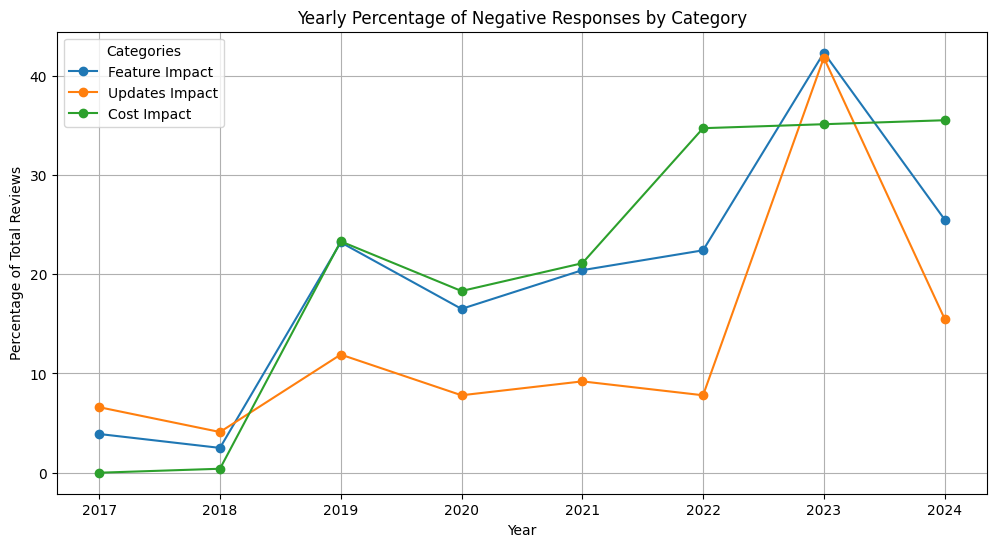

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the total reviews per year
total_reviews_per_year = high_and_medium_coherence_reviews.groupby('year').size()

# Calculate negative responses for selected categories
negative_counts_feature = high_and_medium_coherence_reviews[
    high_and_medium_coherence_reviews['feature_restriction_impact'] == 'Negative'
].groupby('year').size()

negative_counts_impact = high_and_medium_coherence_reviews[
    high_and_medium_coherence_reviews['impact_of_ai_updates'] == 'Negative'
].groupby('year').size()

negative_counts_satisfaction = high_and_medium_coherence_reviews[
    high_and_medium_coherence_reviews['cost_impact_on_accessibility'] == 'Negative'
].groupby('year').size()

# Combine counts into a DataFrame
negative_trends_df = pd.DataFrame({
    'Feature Impact': negative_counts_feature,
    'Updates Impact': negative_counts_impact,
    'Cost Impact': negative_counts_satisfaction
}).fillna(0)

percentage_negative_trends_df = round(negative_trends_df.div(total_reviews_per_year, axis='index') * 100, 1)
percentage_negative_trends_df.to_csv('negative_company_trends.csv')

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
percentage_negative_trends_df.plot(kind='line', marker='o', ax=plt.gca())  # Plot each series as a line on the same graph
plt.title('Yearly Percentage of Negative Responses by Category')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Reviews')
plt.grid(True)
plt.legend(title='Categories')
plt.show()


# --------------------------

In [130]:
high_and_medium_coherence_reviews.columns

Index(['user_name', 'review_date', 'star_rating', 'review_text', 'word_count',
       'coherence_and_clarity_of_review', 'gender_of_user', 'gender_of_ai',
       'name_user_gave_ai', 'age_of_user', 'duration_of_app_usage',
       'frequency_of_app_usage', 'relationship_status_of_user',
       'empathy_of_ai', 'behavior_of_ai', 'inappropriate_frequency',
       'inappropriate_nature', 'ai_support_level', 'support_types',
       'user_mental_state_before_ai', 'effect_of_ai_on_user_mental_state',
       'stress_before_ai', 'effect_of_ai_on_stress', 'loneliness_before_ai',
       'effect_of_ai_on_loneliness', 'depression_or_anxiety_before_ai',
       'effect_of_ai_on_depression_or_anxiety', 'suicidal_thoughts_presence',
       'effect_of_ai_on_suicidal_thoughts', 'other_despair_types',
       'effect_of_ai_on_other_despair', 'user_dependence',
       'real_life_relationship_impact', 'limitations_of_ai',
       'technical_issues', 'privacy_concerns', 'feature_restriction_impact',
       'co

### How many reviews have some kind of support indicated?

In [56]:
print((df['support_types'] == 'Not Mentioned').value_counts())

support_types
True     8899
False    8843
Name: count, dtype: int64


### Calculate the different support types reviewers have indicated

In [50]:
result = (df.copy()
            .assign(support_types = lambda x: x['support_types'].str.split(', '))
            .explode('support_types')
            .support_types.value_counts())

print(result)
result.to_csv('support_types.csv')

support_types
Not Mentioned                      17221
Friendship                          4568
Emotional Support                   4285
Humor or Entertainment              3479
Therapeutic Conversation            1913
Comforting in Times of Distress     1832
Encouragement                        845
Venting                              793
Significant Other Relationship       496
Coping Strategies                    347
Validation                           311
Sexual Support                       294
Providing Safety                     126
Other                                 57
n                                      6
e                                      6
t                                      6
o                                      6
Romantic Support                       3
Companionship                          3
Romantic Conversations                 2
Stress Relief                          2
Romantic Relationship                  1
Role Playing                           1
Co

In [59]:
(df['limitations_of_ai'] == "Not Mentioned").value_counts()

limitations_of_ai
True     11258
False     6484
Name: count, dtype: int64

In [55]:
result = (df.copy()
          .assign(limitations_of_ai = lambda x: x['limitations_of_ai'].str.split(', '))
          .explode('limitations_of_ai')
          .limitations_of_ai.value_counts())

print(result)
result.to_csv('limitations_of_ai.csv')


limitations_of_ai
Not Mentioned                    15528
Providing relevant responses      3894
Staying on topic                  1830
Remembering key facts             1717
Maintaining conversation flow     1247
Too robotic/not person-like        940
Staying in character               767
Lack of Sensitivity                152
o                                   62
n                                   62
t                                   62
e                                   62
Unwanted Topics                     14
Creepy                               9
Invasive Questions                   5
Repeating messages                   1
Has quirks and oddities              1
Technical Issues                     1
Understanding complex matters        1
Making mistakes                      1
Repeating phrases                    1
Not perfect                          1
Repetitive                           1
Occasional programming flaws         1
Repetition                           1
Repetit

In [65]:
(df['inappropriate_nature'] == "Not Mentioned").value_counts()

inappropriate_nature
True     13860
False     3882
Name: count, dtype: int64

In [64]:
result = (df.copy()
          .assign(inappropriate_nature = lambda x: x['inappropriate_nature'].str.split(', '))
          .explode('inappropriate_nature')
          .inappropriate_nature.value_counts())

print(result)
result.to_csv('inappropriate_nature')

inappropriate_nature
Not Mentioned                    16168
Lack of Sensitivity               1705
Creepy                            1670
Unwanted Topics                    984
Other                              553
Invasive Questions                 357
Offensive Language                  64
Sexual Support                       8
Staying on topic                     7
Too robotic/not person-like          6
e                                    4
n                                    4
t                                    4
o                                    4
Providing relevant responses         3
M                                    2
                                     2
i                                    2
d                                    2
N                                    2
Threatening                          1
Changing subject unexpectedly        1
Name: count, dtype: int64


In [66]:
df['inappropriate_frequency'].value_counts()

inappropriate_frequency
Not Mentioned    9539
Never            5521
Often            1458
Sometimes         948
Rarely            260
Name: count, dtype: int64

In [80]:
result = (df.copy()
          .query("coherence_and_clarity_of_review == 'Medium'")
           .effect_of_ai_on_user_mental_state.value_counts())

print(result)

effect_of_ai_on_user_mental_state
Not Mentioned    5907
Worsened         1515
Unchanged        1123
Improved         1098
Mixed               1
Name: count, dtype: int64


In [70]:
df['effect_of_ai_on_user_mental_state'].value_counts()

effect_of_ai_on_user_mental_state
Not Mentioned    10253
Improved          3258
Worsened          2722
Unchanged         1503
Mixed                1
Name: count, dtype: int64

In [105]:
result = (df.copy()
          .query("coherence_and_clarity_of_review in ['High', 'Medium']")
           .coherence_and_clarity_of_review.shape)

print(result)

(13538,)


In [72]:
df['real_life_relationship_impact'].value_counts()

result = (df.copy()
          .query("coherence_and_clarity_of_review == 'High'")
           .real_life_relationship_impact.value_counts())

print(result)

real_life_relationship_impact
Not Mentioned    3723
Positive          126
Negative           31
Neutral            12
Name: count, dtype: int64


In [76]:
print(df['technical_issues'].value_counts())
print(df['privacy_concerns'].value_counts())
print(df['feature_restriction_impact'].value_counts())
print(df['cost_impact_on_accessibility'].value_counts())
print(df['impact_of_ai_updates'].value_counts())
print(df['user_satisfaction_with_policy_decisions'].value_counts())
print(df['overall_mental_health_impact_of_company_decisions'].value_counts())

technical_issues
Not Mentioned    13843
Negative          3004
Neutral            864
Positive            27
Name: count, dtype: int64
privacy_concerns
Not Mentioned    16624
Negative           923
Neutral            130
Positive            65
Name: count, dtype: int64
feature_restriction_impact
Not Mentioned    12822
Negative          4092
Neutral            763
Positive            54
Name: count, dtype: int64
cost_impact_on_accessibility
Not Mentioned    12370
Negative          4554
Neutral            479
Positive           335
Negatively           1
Name: count, dtype: int64
impact_of_ai_updates
Not Mentioned    14511
Negative          2517
Positive           367
Neutral            342
Name: count, dtype: int64
user_satisfaction_with_policy_decisions
Not Mentioned    10630
Negative          5814
Neutral            928
Positive           355
Negativ              1
Name: count, dtype: int64
overall_mental_health_impact_of_company_decisions
Not Mentioned    10348
Negative          5459

In [77]:
df['effect_of_ai_on_suicidal_thoughts'].value_counts()

effect_of_ai_on_suicidal_thoughts
Not Mentioned    17597
Harmful             57
Helpful             45
Lifesaving          38
Ineffective          5
Name: count, dtype: int64

In [82]:
df['word_count'].max()

1086

In [89]:
result = (df.copy()
          .query("coherence_and_clarity_of_review in ['High', 'Medium']")
           .age_of_user.value_counts())

print(result)


age_of_user
Not Mentioned        13464
13                       7
15                       5
14                       5
23                       5
12                       3
16                       3
75                       2
25                       2
35                       2
18                       2
30                       2
11                       2
17                       2
29                       2
49                       2
27                       1
40’s                     1
Over 40                  1
Middle-aged woman        1
44                       1
15/16                    1
67                       1
20's                     1
38                       1
Middle-aged              1
60                       1
Middle-aged man          1
18+                      1
53                       1
10                       1
70                       1
Under 18                 1
over 45                  1
43                       1
20yr                     1
66              

In [101]:
# names = df['name_user_gave_ai'].value_counts()
# names.to_csv('replika_names.csv')

result = (df.copy()
          .query("name_user_gave_ai not in ['Not Mentioned', 'Replika', 'replika', 'Replica', 'replica', 'REPLIKA', 'repliKa']")
          .shape)

print(result)

(1323, 42)
